[137. 121. 262. 396. 359.]
[337. 183. 102. 195. 355.]


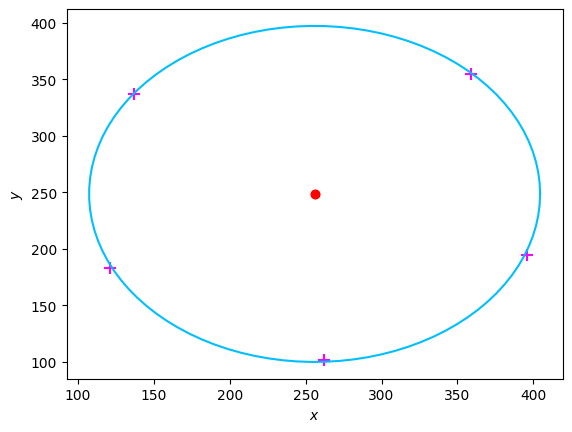

In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as so
import numpy as np

point_num = 5  # Number of points to generate on the ellipse

def my_fun(parameters, x_samples, y_samples):
    # Unpack parameters: two focus points and the target distance sum
    x_focus_1, y_focus_1, x_focus_2, y_focus_2, sum_of_target_distance = parameters
    
    # Calculate the actual distances from the points to the two foci
    sum_of_actual_distance = (
        np.sqrt((x_samples - x_focus_1) ** 2 + (y_samples - y_focus_1) ** 2) +
        np.sqrt((x_samples - x_focus_2) ** 2 + (y_samples - y_focus_2) ** 2)
    )
    
    # Return the variance of the difference between actual and target distances
    return np.sum(((sum_of_actual_distance - sum_of_target_distance) ** 2) / (len(x_samples) - 1))

def fit_ellipse(x_samples, y_samples):


    # Optimize to fit the ellipse using initial guesses for the parameters
    initial_guess = np.array([np.mean(x_samples), np.mean(y_samples), np.mean(x_samples), np.mean(y_samples), 100])  # Initial focus points and target distance
    res_optimized = so.minimize(fun=my_fun, x0=initial_guess, args=(x_samples, y_samples))
    
    if res_optimized.success:
        # Unpack optimized parameters
        x1_res, y1_res, x2_res, y2_res, l2_res = res_optimized.x
        
        # Calculate the angle of the ellipse based on the foci
        alpha_res = np.arctan2(y2_res - y1_res, x2_res - x1_res)
        
        # Calculate the distance between the foci
        l_ab = np.sqrt((y2_res - y1_res) ** 2 + (x2_res - x1_res) ** 2)
        
        # Calculate semi-major and semi-minor axes
        a_res = l2_res / 2  # Semi-major axis length
        b_res = np.sqrt((l2_res / 2) ** 2 - (l_ab / 2) ** 2)  # Semi-minor axis length

        # Generate points on the ellipse
        theta_res = np.linspace(0.0, 2 * np.pi, 100)  # Angle values
        x_res = a_res * np.cos(theta_res) * np.cos(alpha_res) - b_res * np.sin(theta_res) * np.sin(alpha_res) + (x1_res+x2_res)/2
        y_res = b_res * np.sin(theta_res) * np.cos(alpha_res) + a_res * np.cos(theta_res) * np.sin(alpha_res) + (y1_res+y2_res)/2

        print(x_samples)
        print(y_samples)

        plt.scatter(x_samples, y_samples, color="magenta", marker="+", zorder=1, s=80, label="samples")
        plt.plot(x_res, y_res, color="deepskyblue", zorder=2, label="fitted curve")
        plt.scatter(np.array([x1_res, x2_res]), np.array([y1_res, y2_res]), zorder=3, color="r", label="focus points")
        plt.xlabel("$x$")
        plt.ylabel("$y$")
        # plt.legend()

        plt.show()  # Display the plot

if __name__ == "__main__":
    # Generate sample data points on the ellipse
    theta_samples = np.linspace(0, 10, point_num)
    
    # Ellipse orientation (angle in radians)
    alpha_samples = -45.0 / 180.0 * np.pi
    
    # Semi-major and semi-minor axes lengths
    a_samples = 1.0
    b_samples = 2.0
    
    # Generate x and y samples, adding some noise
    x_samples = a_samples * np.cos(theta_samples) * np.cos(alpha_samples) - b_samples * np.sin(theta_samples) * np.sin(alpha_samples)
    y_samples = b_samples * np.sin(theta_samples) * np.cos(alpha_samples) + a_samples * np.cos(theta_samples) * np.sin(alpha_samples)

    x_samples = np.array([137.0, 121.0, 262.0, 396.0, 359.0])
    y_samples = np.array([337.0, 183.0, 102.0, 195.0, 355.0])

    # Fit the ellipse to the generated samples
    fit_ellipse(x_samples, y_samples)


# print(x_samples)
# print(y_samples)